#### Our neural network will model a single hidden layer with three inputs and one output. In the network, we will be predicting the score of our exam based on the inputs of how many hours we studied and how many hours we slept the day before. Our test score is the output. <br/>
Here’s our sample data of what we’ll be training our Neural Network on:<br/>


The ? in this case represents what we want our neural network to predict. In this case, we are predicting the test score of someone who studied for four hours and slept for eight hours based on their prior performance.

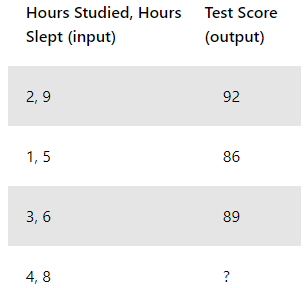

In [2]:
from IPython.display import Image
Image("fig1.png")

#### First, let’s import our data as numpy arrays using np.array. We’ll also want to normalize our units as our inputs are in hours, but our output is a test score from 0-100. Therefore, we need to scale our data by dividing by the maximum value for each variable.

In [7]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

#### Next, let’s define a python class and write an init function where we’ll specify our parameters such as the input, hidden, and output layers. <br/>

In [8]:
class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

#### Remember that our synapses perform a dot product, or matrix multiplication of the input and weight. Note that weights are generated randomly and between 0 and 1.

### The calculations behind our network

#### In the data set, our input data, X, is a 3x2 matrix. Our output data, y, is a 3x1 matrix. Each element in matrix X needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron in the hidden layer.

#### Here’s how the first input data element (2 hours studying and 9 hours sleeping) would calculate an output in the network:

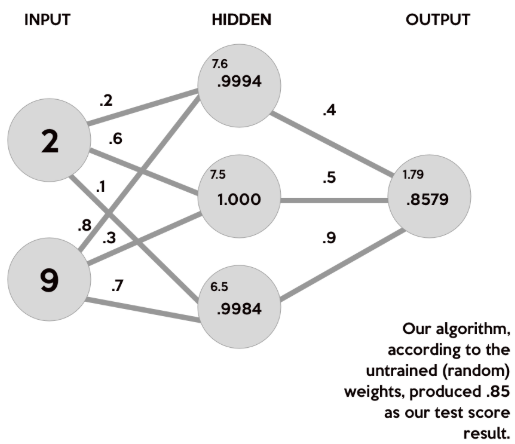

In [4]:
Image("fig2.png")

#### This image breaks down what our neural network actually does to produce an output. First, the products of the random generated weights (.2, .6, .1, .8, .3, .7) on each synapse and the corresponding inputs are summed to arrive as the first values of the hidden layer. These sums are in a smaller font as they are not the final values for the hidden layer.
(2 \* .2) + (9 \* .8) = 7.6 <br/>
(2 \* .6) + (9 \* .3) = 3.9 <br/>
(2 \* .1) + (9 \* .7) = 6.5

#### To get the final value for the hidden layer, we need to apply the activation function. The role of an activation function is to introduce non-linearity. An advantage of this is that the output is mapped from a range of 0 and 1, making it easier to alter weights in the future. <br/>
There are many activation functions out there. In this case, we’ll stick to one of the more popular ones - the <b>sigmoid function</b>.

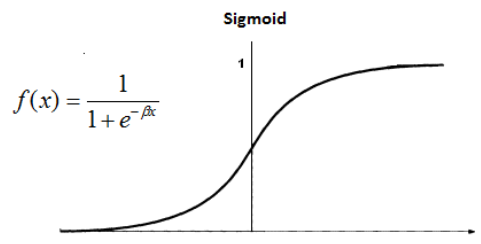

In [5]:
Image("fig3.png")

S(7.6) = 0.999499799<br/>
S(7.5) = 1.000553084<br/>
S(6.5) = 0.998498818

#### Now, we need to use matrix multiplication again, with another set of random weights, to calculate our output layer value.
(.9994 \* .4) + (1.000 \* .5) + (.9984 \* .9) = 1.79832

#### Lastly, to normalize the output, we just apply the activation function again.
S(1.79832) = .8579443067

### Implementing the calculations

#### Now, let’s generate our weights randomly using np.random.randn(). <br/>Remember, we’ll need two sets of weights. One to go from the input to the hidden layer, and the other to go from the hidden to output layer.

class Neural_Network(object):
  <br/>def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

Once we have all the variables set up, we are ready to write our forward propagation function. Let’s pass in our input, X, and in this example, we can use the variable z to simulate the activity between the input and output layers. As explained, we need to take a dot product of the inputs and weights, apply an activation function, take another dot product of the hidden layer and second set of weights, and lastly apply a final activation function to recieve our output:

class Neural_Network(object):<br/>
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
          self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
          self.z2 = self.sigmoid(self.z) # activation function
          self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
          o = self.sigmoid(self.z3) # final activation function
          return o

#### Lastly, we need to define our sigmoid function:

In [19]:
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        # (3x2) weight matrix from input to hidden layer
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) 
        # (3x1) weight matrix from hidden to output layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        # dot product of hidden layer (z2) and second set of 3x1 weights
        self.z3 = np.dot(self.z2, self.W2) 
        o = self.sigmoid(self.z3) # final activation function
        return o

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))

In [20]:
NN = Neural_Network()

#defining our output
o = NN.forward(X)

print("Predicted Output: \n" + str(o))
print("Actual Output: \n" + str(y))

Predicted Output: 
[[0.6224675 ]
 [0.61643848]
 [0.59483433]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
